In [1]:
!pip install kaggle

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import numpy as np
%matplotlib inline
!pip install Unidecode
import unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 8.0 MB/s eta 0:00:00


In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia
!unzip -l udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 386MB/s]
Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  4716673  2025-03-25 16:54   submission_example.csv
 59185250  2025-03-25 16:54   test.csv
143732449  2025-03-25 16:54   train.csv
---------                     -------
207634372                     3 files
Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


#Exploración de los datos

In [3]:
tr = pd.read_csv("train.csv")
print("Rows and columns", tr.shape)

Rows and columns (692500, 21)


#DataFrame

In [4]:
tr.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


#Información de columnas y sus tipos

In [5]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

In [6]:
tr.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

##Eliminación de columna ID, no es relevante para el análisis

In [7]:
tr = tr.drop(['ID'], axis=1)
tr.columns

Index(['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

##Columnas con valores nulos

In [8]:
null_columns_df = tr.isna().sum()

#Variable objetivo RENDIMIENTO_GLOBAL con conteo y gráfica

Gráfico sobre el rendimiento global de los estudiantes


,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


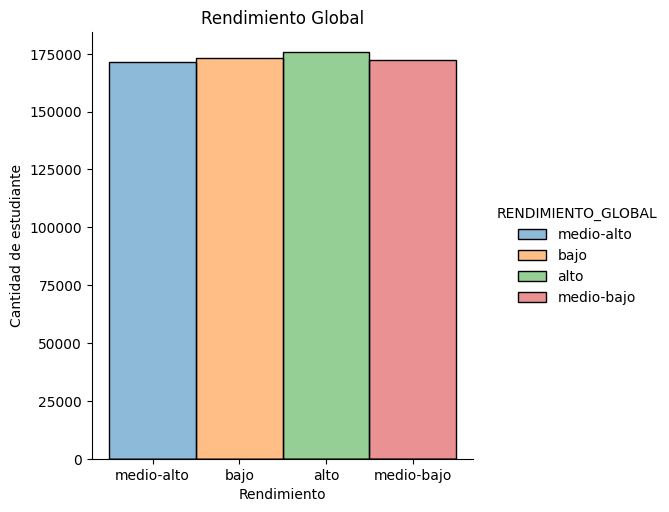

In [9]:
target_variable_plt = sns.displot(
    tr, x='RENDIMIENTO_GLOBAL',
    hue='RENDIMIENTO_GLOBAL'
    )
target_variable_plt.set(title='Rendimiento Global', xlabel='Rendimiento', ylabel='Cantidad de estudiante')
print('Gráfico sobre el rendimiento global de los estudiantes')
del(target_variable_plt)


tr["RENDIMIENTO_GLOBAL"].value_counts()


#Conteos de valores por columnas y eliminacion de FAMI_TIENEINTERNET.1 por repetirse

In [10]:
tr["FAMI_TIENEINTERNET"].value_counts()


,count
FAMI_TIENEINTERNET,
Si,592514
No,73357


In [11]:
tr["FAMI_TIENEINTERNET.1"].value_counts()

,count
FAMI_TIENEINTERNET.1,
Si,592514
No,73357


In [12]:
tr = tr.drop(["FAMI_TIENEINTERNET.1"], axis=1)


In [13]:
tr.columns

Index(['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2',
       'coef_3', 'coef_4'],
      dtype='object')

#Columnas categoricas y algunas gráficas de visualización

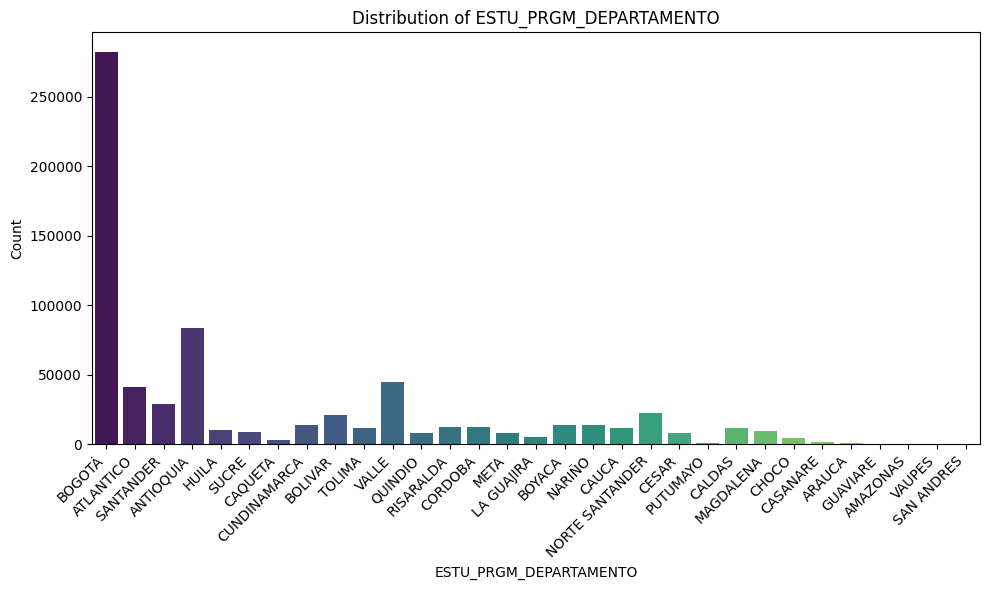

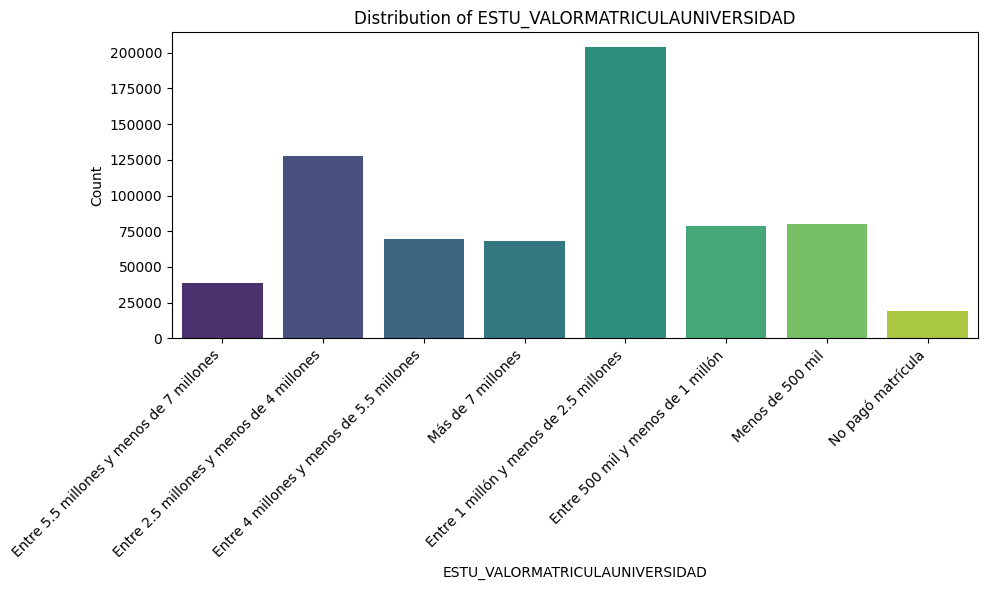

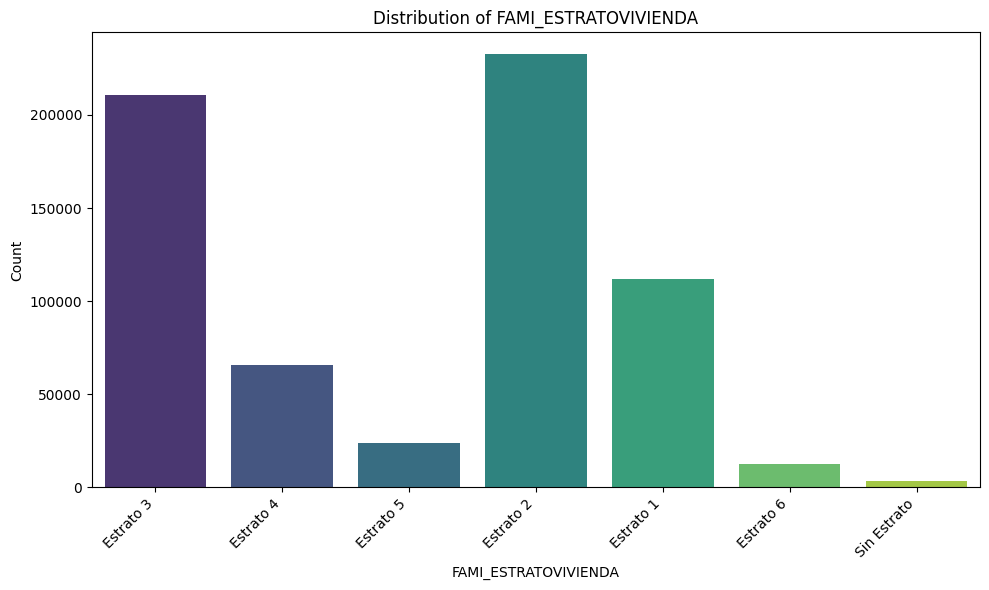

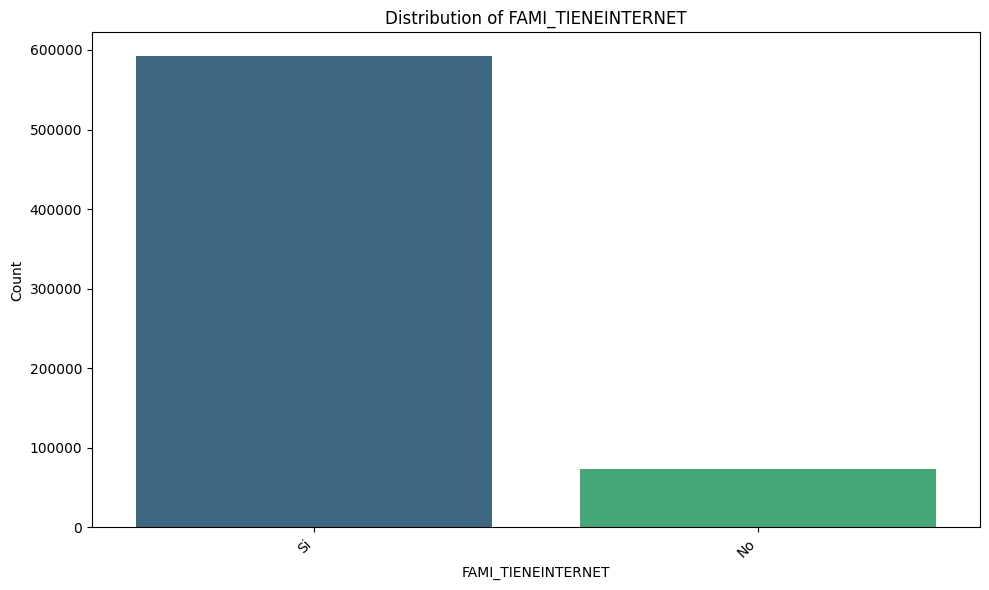

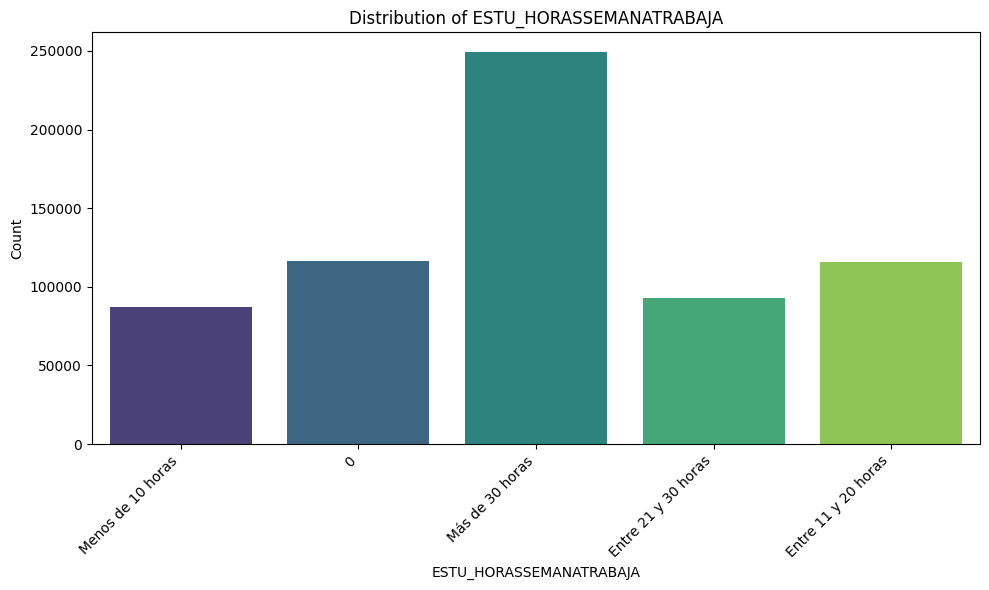

In [14]:
import matplotlib.pyplot as plt

categorical_columns = [
    'ESTU_PRGM_ACADEMICO',
    'ESTU_PRGM_DEPARTAMENTO',
    'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_HORASSEMANATRABAJA',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE',
    'FAMI_TIENELAVADORA',
    'FAMI_TIENEAUTOMOVIL',
    'ESTU_PRIVADO_LIBERTAD',
    'ESTU_PAGOMATRICULAPROPIO',
    'FAMI_TIENECOMPUTADOR',
    'FAMI_EDUCACIONMADRE'
]

# You can select which columns to plot
columns_to_plot = [
    'ESTU_PRGM_DEPARTAMENTO',
    'ESTU_VALORMATRICULAUNIVERSIDAD',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'ESTU_HORASSEMANATRABAJA'
]

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=tr, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#Verificación de missing values y su reemplazo por la moda

In [15]:
# Identify columns with missing values based on the initial analysis
# Filter to include only columns that still exist in the DataFrame
columns_with_missing = [col for col in null_columns_df[null_columns_df > 0].index.tolist() if col in tr.columns]

# Impute missing values with the mode for each column
for col in columns_with_missing:
    mode_value = tr[col].mode()[0] # Calculate the mode (mode() returns a Series, take the first value)
    tr[col] = tr[col].fillna(mode_value)

# Verify that there are no more missing values in these columns
print("Missing values after imputation:")
print(tr[columns_with_missing].isna().sum())

tr.head()

Missing values after imputation:
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_TIENELAVADORA                0
FAMI_TIENEAUTOMOVIL               0
ESTU_PAGOMATRICULAPROPIO          0
FAMI_TIENECOMPUTADOR              0
FAMI_EDUCACIONMADRE               0
dtype: int64


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


#Aplicación de One Hot a las respectivas columnas

In [16]:
def to_onehot(x):
    values = np.unique(x)
    r = np.r_[[np.argwhere(i==values)[0][0] for i in x]]
    return np.eye(len(values))[r].astype(int)

def replace_column_with_onehot(d, col):
    assert sum(d[col].isna())==0, "column must have no NaN values"
    values = np.unique(d[col])
    k = to_onehot(d[col].values)
    r = d.join(pd.DataFrame(k, columns=["%s_%s"%(col, values[i]) for i in range(k.shape[1])], index=d.index), how='outer')
    del(r[col])
    return r

columns_to_onehot =[
    'FAMI_TIENEINTERNET',
    'ESTU_PAGOMATRICULAPROPIO'

]
onehoted_df = tr.copy()
for col in columns_to_onehot:
  onehoted_df = replace_column_with_onehot(onehoted_df, col)
onehoted_df

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Técnica o tecnológica incompleta,Si,Si,N,...,Postgrado,medio-alto,0.322,0.208,0.310,0.267,0,1,1,0
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,Técnica o tecnológica completa,Si,No,N,...,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,1,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Secundaria (Bachillerato) completa,Si,No,N,...,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,0,1,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,No sabe,Si,No,N,...,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,0,1,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Primaria completa,Si,Si,N,...,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Secundaria (Bachillerato) completa,Si,No,N,...,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311,0,1,0,1
692496,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Primaria incompleta,Si,No,N,...,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260,0,1,1,0
692497,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Secundaria (Bachillerato) completa,Si,No,N,...,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287,0,1,0,1
692498,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,Primaria completa,No,No,N,...,Primaria completa,bajo,0.132,0.426,0.261,0.328,1,0,0,1


#Cambio de variables categoricas y valores únicos

In [17]:
print(tr["ESTU_VALORMATRICULAUNIVERSIDAD"].unique())

['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula']


In [18]:
def replace_category_for_numbers(d, col, vals_to_change):
  r = d.copy()
  r[col] = r[col].replace(vals_to_change.keys(), vals_to_change.values())
  return r

data_matricula_dict = {
    'No pagó matrícula': 1,
    'Menos de 500 mil': 2,
    'Entre 500 mil y menos de 1 millón': 3,
    'Entre 1 millón y menos de 2.5 millones': 4,
    'Entre 2.5 millones y menos de 4 millones': 5,
    'Entre 4 millones y menos de 5.5 millones': 6,
    'Entre 5.5 millones y menos de 7 millones': 7,
    'Más de 7 millones': 8,
 }
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "ESTU_VALORMATRICULAUNIVERSIDAD",
    data_matricula_dict)
onehoted_df.head()

<ipython-input-18-61783b2b2d0a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  r[col] = r[col].replace(vals_to_change.keys(), vals_to_change.values())


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,Menos de 10 horas,Estrato 3,Técnica o tecnológica incompleta,Si,Si,N,...,Postgrado,medio-alto,0.322,0.208,0.310,0.267,0,1,1,0
1,20212,DERECHO,ATLANTICO,5,0,Estrato 3,Técnica o tecnológica completa,Si,No,N,...,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,1,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,Más de 30 horas,Estrato 3,Secundaria (Bachillerato) completa,Si,No,N,...,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,0,1,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,0,Estrato 4,No sabe,Si,No,N,...,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,0,1,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,Entre 21 y 30 horas,Estrato 3,Primaria completa,Si,Si,N,...,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,0,1,1,0


In [19]:
print(tr["ESTU_HORASSEMANATRABAJA"].unique())

['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas']


In [20]:
data_working_hours_dict = {
    '0': 1,
    'Menos de 10 horas': 2,
    'Entre 11 y 20 horas': 3,
    'Entre 21 y 30 horas': 4,
    'Más de 30 horas': 5,
 }
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "ESTU_HORASSEMANATRABAJA",
    data_working_hours_dict)
onehoted_df.head()

<ipython-input-18-61783b2b2d0a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  r[col] = r[col].replace(vals_to_change.keys(), vals_to_change.values())


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,Estrato 3,Técnica o tecnológica incompleta,Si,Si,N,...,Postgrado,medio-alto,0.322,0.208,0.310,0.267,0,1,1,0
1,20212,DERECHO,ATLANTICO,5,1,Estrato 3,Técnica o tecnológica completa,Si,No,N,...,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,1,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,Estrato 3,Secundaria (Bachillerato) completa,Si,No,N,...,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,0,1,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,Estrato 4,No sabe,Si,No,N,...,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,0,1,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,Estrato 3,Primaria completa,Si,Si,N,...,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,0,1,1,0


In [21]:
print(tr["FAMI_ESTRATOVIVIENDA"].unique())

['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' 'Estrato 6'
 'Sin Estrato']


In [22]:
data_estrato_dict = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
 }
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "FAMI_ESTRATOVIVIENDA",
    data_estrato_dict)
onehoted_df.head()

<ipython-input-18-61783b2b2d0a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  r[col] = r[col].replace(vals_to_change.keys(), vals_to_change.values())


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,3,Técnica o tecnológica incompleta,Si,Si,N,...,Postgrado,medio-alto,0.322,0.208,0.310,0.267,0,1,1,0
1,20212,DERECHO,ATLANTICO,5,1,3,Técnica o tecnológica completa,Si,No,N,...,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,1,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,3,Secundaria (Bachillerato) completa,Si,No,N,...,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,0,1,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,4,No sabe,Si,No,N,...,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,0,1,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,3,Primaria completa,Si,Si,N,...,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,0,1,1,0


In [23]:
print(tr["FAMI_EDUCACIONPADRE"].unique())

['Técnica o tecnológica incompleta' 'Técnica o tecnológica completa'
 'Secundaria (Bachillerato) completa' 'No sabe' 'Primaria completa'
 'Educación profesional completa' 'Educación profesional incompleta'
 'Primaria incompleta' 'Postgrado' 'Secundaria (Bachillerato) incompleta'
 'Ninguno' 'No Aplica']


In [24]:
data_education_dict = {
    'No Aplica': -1,
    'Ninguno': 0,
    'No sabe': 1,
    'Primaria incompleta': 2,
    'Primaria completa': 3,
    'Secundaria (Bachillerato) incompleta': 4,
    'Secundaria (Bachillerato) completa': 5,
    'Técnica o tecnológica incompleta': 6,
    'Técnica o tecnológica completa': 7,
    'Educación profesional incompleta': 8,
    'Educación profesional completa': 9,
    'Postgrado': 10,
 }
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "FAMI_EDUCACIONPADRE",
    data_education_dict)
onehoted_df.head()

<ipython-input-18-61783b2b2d0a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  r[col] = r[col].replace(vals_to_change.keys(), vals_to_change.values())


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,3,6,Si,Si,N,...,Postgrado,medio-alto,0.322,0.208,0.310,0.267,0,1,1,0
1,20212,DERECHO,ATLANTICO,5,1,3,7,Si,No,N,...,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,1,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,3,5,Si,No,N,...,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,0,1,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,4,1,Si,No,N,...,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,0,1,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,3,3,Si,Si,N,...,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,0,1,1,0


In [25]:
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "FAMI_EDUCACIONMADRE",
    data_education_dict)
onehoted_df.head()

<ipython-input-18-61783b2b2d0a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  r[col] = r[col].replace(vals_to_change.keys(), vals_to_change.values())


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,3,6,Si,Si,N,...,10,medio-alto,0.322,0.208,0.310,0.267,0,1,1,0
1,20212,DERECHO,ATLANTICO,5,1,3,7,Si,No,N,...,6,bajo,0.311,0.215,0.292,0.264,1,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,3,5,Si,No,N,...,5,bajo,0.297,0.214,0.305,0.264,0,1,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,4,1,Si,No,N,...,5,alto,0.485,0.172,0.252,0.190,0,1,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,3,3,Si,Si,N,...,3,medio-bajo,0.316,0.232,0.285,0.294,0,1,1,0


#Limpieza y formato de programas académicos

In [26]:
formated_df = onehoted_df.copy()

def replace_word(word, sentence: str):
  return sentence.replace(" DE ", " ")

def replace_wrong_words(sentence):
  result = sentence
  wrong_words_dict = {
      '3DEG ': '',
      ' PRIMARIA ': ' ', # Hay ciertas carreras que tienen esta palabra extra
      ' PRIMARIA:': ' ',
      'INGENIER?A': 'INGENIERIA',
      'II': 'I',
      'EDUCACI?N': 'EDUCACION',
      'F?SICA': 'FISICA',
      'RECREACI?N': 'RECREACION',
      '?NFASIS': 'ENFASIS',
      'INGL?S': 'INGLES',
      'DISE?O': 'DISENO',
      'COMUNICACI?N': 'COMUNICACION',
      'QU?MICA': 'QUIMICA',
      'MATEM?TICAS': 'MATEMATICAS',
      'EL?CTRICA': 'ELECTRICA',
      'M?SICA': 'MUSICA',
      'DISE??O': 'DISENO',
      'COMUNICACI??N': 'COMUNICACION',
      'QU?MICA': 'QUIMICA',
      'GESTI?N': 'GESTION',
      'GR??FICA': 'GRAFICA',
      'B?SICA': 'BASICA',
      'ADMINISTRACI?N': 'ADMINISTRACION',
      'P?BLICA': 'PUBLICA',
      'FARMAC?UTICA': 'FARMACEUTICA',
      'FILOSOF?A': 'FILOSOFIA',
      'ESC?NICAS': 'ESCENICAS',
      'ECONOM?A': 'ECONOMIA',
      'GASTRONOM?A': 'GASTRONOMIA',
      'GEOLOG?A': 'GEOLOGIA',
      'LOG?STICA': 'LOGISTICA',
      'ART?STICA': 'ARTISTICA',
      'PEDAGOG?A': 'PEDAGOGIA',
      ' DE ': ' ',
      ' EN ': ' ',
      '  ': ' ',
      '.': '',
      '- ': ' ',
  }
  for wrong, well in wrong_words_dict.items():
    if wrong in result: result = result.replace(wrong, well)
  return result


formated_df["ESTU_PRGM_ACADEMICO"] = formated_df["ESTU_PRGM_ACADEMICO"].map(unidecode.unidecode)
formated_df["ESTU_PRGM_ACADEMICO"] = formated_df["ESTU_PRGM_ACADEMICO"].map(lambda sentence: sentence.upper())
formated_df["ESTU_PRGM_ACADEMICO"] = formated_df["ESTU_PRGM_ACADEMICO"].map(replace_wrong_words)
formated_df["ESTU_PRGM_DEPARTAMENTO"] = formated_df["ESTU_PRGM_DEPARTAMENTO"].map(unidecode.unidecode)

#Aplicación de target para columnas grandes

In [27]:
# First, let's map the target variable to numerical values for target encoding
# We can use the order observed in value_counts or define a specific order
target_mapping = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}

onehoted_df['RENDIMIENTO_GLOBAL_encoded'] = onehoted_df['RENDIMIENTO_GLOBAL'].map(target_mapping)

# Implement Target Encoding for high-cardinality columns
high_cardinality_cols = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO']

for col in high_cardinality_cols:
    # Calculate the mean of the encoded target for each category
    target_mean = onehoted_df.groupby(col)['RENDIMIENTO_GLOBAL_encoded'].mean()
    # Map the original column to the calculated target mean
    onehoted_df[f'{col}_TargetEncoded'] = onehoted_df[col].map(target_mean)
    # Drop the original high-cardinality column
    onehoted_df = onehoted_df.drop(col, axis=1)

# Now, handle the remaining categorical columns with one-hot encoding
# Exclude columns already handled or the original target column
categorical_cols_for_onehot = [
    'FAMI_TIENELAVADORA',
    'FAMI_TIENEAUTOMOVIL',
    'ESTU_PRIVADO_LIBERTAD',
    'FAMI_TIENECOMPPUTADOR'
]

for col in categorical_cols_for_onehot:
    if col in onehoted_df.columns: # Check if the column still exists
        onehoted_df = replace_column_with_onehot(onehoted_df, col)


# Display the first few rows of the processed DataFrame
display(onehoted_df.head())

# Display the columns to see the new and removed ones
print("\nUpdated columns:")
print(onehoted_df.columns)

,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,...,ESTU_PAGOMATRICULAPROPIO_Si,RENDIMIENTO_GLOBAL_encoded,ESTU_PRGM_ACADEMICO_TargetEncoded,ESTU_PRGM_DEPARTAMENTO_TargetEncoded,FAMI_TIENELAVADORA_No,FAMI_TIENELAVADORA_Si,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,ESTU_PRIVADO_LIBERTAD_N,ESTU_PRIVADO_LIBERTAD_S
0,20212,7,2,3,6,Si,10,medio-alto,0.322,0.208,...,0,2,1.313623,1.557381,0,1,0,1,1,0
1,20212,5,1,3,7,Si,6,bajo,0.311,0.215,...,0,0,1.629461,1.454778,0,1,1,0,1,0
2,20203,5,5,3,5,No,5,bajo,0.297,0.214,...,0,0,1.479789,1.557381,0,1,1,0,1,0
3,20195,6,1,4,1,Si,5,alto,0.485,0.172,...,0,3,1.298813,1.734286,0,1,1,0,1,0
4,20212,5,4,3,3,Si,3,medio-bajo,0.316,0.232,...,0,1,1.466303,1.667600,0,1,0,1,1,0



Updated columns:
Index(['PERIODO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENECOMPUTADOR',
       'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2',
       'coef_3', 'coef_4', 'FAMI_TIENEINTERNET_No', 'FAMI_TIENEINTERNET_Si',
       'ESTU_PAGOMATRICULAPROPIO_No', 'ESTU_PAGOMATRICULAPROPIO_Si',
       'RENDIMIENTO_GLOBAL_encoded', 'ESTU_PRGM_ACADEMICO_TargetEncoded',
       'ESTU_PRGM_DEPARTAMENTO_TargetEncoded', 'FAMI_TIENELAVADORA_No',
       'FAMI_TIENELAVADORA_Si', 'FAMI_TIENEAUTOMOVIL_No',
       'FAMI_TIENEAUTOMOVIL_Si', 'ESTU_PRIVADO_LIBERTAD_N',
       'ESTU_PRIVADO_LIBERTAD_S'],
      dtype='object')


In [28]:
# Apply one-hot encoding to FAMI_TIENECOMPUTADOR
if 'FAMI_TIENECOMPUTADOR' in onehoted_df.columns:
    onehoted_df = replace_column_with_onehot(onehoted_df, 'FAMI_TIENECOMPUTADOR')
else:
    print("Column 'FAMI_TIENECOMPUTADOR' not found in the DataFrame.")

# Display the first few rows to see the result
display(onehoted_df.head())

# Display the columns to confirm the change
print("\nUpdated columns after one-hot encoding FAMI_TIENECOMPUTADOR:")
print(onehoted_df.columns)

,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,...,ESTU_PRGM_ACADEMICO_TargetEncoded,ESTU_PRGM_DEPARTAMENTO_TargetEncoded,FAMI_TIENELAVADORA_No,FAMI_TIENELAVADORA_Si,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,ESTU_PRIVADO_LIBERTAD_N,ESTU_PRIVADO_LIBERTAD_S,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si
0,20212,7,2,3,6,10,medio-alto,0.322,0.208,0.310,...,1.313623,1.557381,0,1,0,1,1,0,0,1
1,20212,5,1,3,7,6,bajo,0.311,0.215,0.292,...,1.629461,1.454778,0,1,1,0,1,0,0,1
2,20203,5,5,3,5,5,bajo,0.297,0.214,0.305,...,1.479789,1.557381,0,1,1,0,1,0,1,0
3,20195,6,1,4,1,5,alto,0.485,0.172,0.252,...,1.298813,1.734286,0,1,1,0,1,0,0,1
4,20212,5,4,3,3,3,medio-bajo,0.316,0.232,0.285,...,1.466303,1.667600,0,1,0,1,1,0,0,1



Updated columns after one-hot encoding FAMI_TIENECOMPUTADOR:
Index(['PERIODO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4',
       'FAMI_TIENEINTERNET_No', 'FAMI_TIENEINTERNET_Si',
       'ESTU_PAGOMATRICULAPROPIO_No', 'ESTU_PAGOMATRICULAPROPIO_Si',
       'RENDIMIENTO_GLOBAL_encoded', 'ESTU_PRGM_ACADEMICO_TargetEncoded',
       'ESTU_PRGM_DEPARTAMENTO_TargetEncoded', 'FAMI_TIENELAVADORA_No',
       'FAMI_TIENELAVADORA_Si', 'FAMI_TIENEAUTOMOVIL_No',
       'FAMI_TIENEAUTOMOVIL_Si', 'ESTU_PRIVADO_LIBERTAD_N',
       'ESTU_PRIVADO_LIBERTAD_S', 'FAMI_TIENECOMPUTADOR_No',
       'FAMI_TIENECOMPUTADOR_Si'],
      dtype='object')


#Normalización final para la preparación del modelo

In [29]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding the encoded target if you want to keep it separate)
numerical_cols_to_scale = onehoted_df.select_dtypes(include=np.number).columns.tolist()

# Exclude the encoded target variable if it's in the list (assuming you want to predict it)
if 'RENDIMIENTO_GLOBAL_encoded' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('RENDIMIENTO_GLOBAL_encoded')

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
onehoted_df[numerical_cols_to_scale] = scaler.fit_transform(onehoted_df[numerical_cols_to_scale])

# Display the first few rows of the scaled DataFrame to verify
display(onehoted_df.head())

,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,...,ESTU_PRGM_ACADEMICO_TargetEncoded,ESTU_PRGM_DEPARTAMENTO_TargetEncoded,FAMI_TIENELAVADORA_No,FAMI_TIENELAVADORA_Si,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,ESTU_PRIVADO_LIBERTAD_N,ESTU_PRIVADO_LIBERTAD_S,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si
0,1.294094,1.383918,-0.971956,0.456215,0.358716,1.777156,medio-alto,0.437002,-0.556223,0.813978,...,-0.405057,0.248461,-0.384856,0.384856,-1.389589,1.389589,0.007007,-0.007007,-0.298706,0.298706
1,1.294094,0.270116,-1.628413,0.456215,0.712693,0.240463,bajo,0.346934,-0.481341,0.508180,...,0.262632,-0.240343,-0.384856,0.384856,0.719637,-0.719637,0.007007,-0.007007,-0.298706,0.298706
2,0.439801,0.270116,0.997418,0.456215,0.004738,-0.143710,bajo,0.232301,-0.492038,0.729034,...,-0.053777,0.248461,-0.384856,0.384856,0.719637,-0.719637,0.007007,-0.007007,3.347774,-3.347774
3,-0.319570,0.827017,-1.628413,1.363766,-1.411171,-0.143710,alto,1.771650,-0.941332,-0.171371,...,-0.436364,1.091248,-0.384856,0.384856,0.719637,-0.719637,0.007007,-0.007007,-0.298706,0.298706
4,1.294094,0.270116,0.340960,0.456215,-0.703216,-0.912057,medio-bajo,0.387874,-0.299484,0.389259,...,-0.082286,0.773550,-0.384856,0.384856,-1.389589,1.389589,0.007007,-0.007007,-0.298706,0.298706
